# Quant TSLA Trading Project 

**Student:** Bruno Lima (netID: bml55) <br />
**Email:** bruno.lima@duke.edu

# 1. Importing Libraries

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Load, Parse, and Format Data

Notes: credit.txt was missing the 15th person for some reason, so I got its value from the excel spreadsheet




In [2]:
file = open('data.txt', 'r')
read = file.readlines()
modified = []

for line in read:
    modified.append(line.strip().replace('(', '').replace(')', ''))

def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

def listC(modified, index):
    lista = []
    j = index + 1
    while (has_numbers(modified[j])):
        listToAdd = modified[j].replace("(", "").replace(")", "").replace("s", "").split(" ")
        lista.extend(listToAdd)
        j = j + 1
    return lista

for i in range(152):
    if modified[i] == 'approved':
        approvedList = listC(modified, i)
    if modified[i] == 'unemployed':
        unemployedList = listC(modified, i)
    if modified[i] == 'purchase':
        purchaseList = listC(modified, i)
    if modified[i] == 'female':
        femaleList = listC(modified, i)
    if modified[i] == 'married':
        marriedList = listC(modified, i)
    if modified[i] == 'region':
        regionList = listC(modified, i)
    if modified[i] == 'age':
        ageList = listC(modified, i)
    if modified[i] == 'account':
        accountList = listC(modified, i)
    if modified[i] == 'loan':
        loanList = listC(modified, i)
    if modified[i] == 'months':
        monthsList = listC(modified, i)
    if modified[i] == 'years':
        yearsList = listC(modified, i)

# print(yearsList)
        
'''approved unemployed purchase male married region age account loan months years'''

def finalC(lista):
    finList = [0] * 125
    for el in lista:
        val = int(el)
        finList[val - 1] = 1
    return finList

def finalCtwo(lista):
    finList = [0] * 125
    for i in range(len(lista)):
        if i % 2 == 0:
            finList[int(i/2)] = lista[i+1]
    return finList

index = [0] * 125
for i in range(125):
    index[i] = i + 1

data = {'approved':finalC(approvedList),
        'unemployed':finalC(unemployedList),
        'purchase':finalCtwo(purchaseList),
        'female':finalC(femaleList),
        'married':finalC(marriedList),
        'region':finalC(regionList),
        'age':finalCtwo(ageList),
        'account':finalCtwo(accountList),
        'loan':finalCtwo(loanList),
        'months':finalCtwo(monthsList),
        'years':finalCtwo(yearsList)}

df = pd.DataFrame(data, index)
df

,approved,unemployed,purchase,female,married,region,age,account,loan,months,years
1,1,0,pc,1,1,0,18,20,2,15,1
2,1,0,pc,1,1,0,20,10,2,20,2
3,0,1,pc,1,0,1,25,5,4,12,0
4,1,0,pc,1,0,0,40,5,7,12,2
5,1,0,pc,1,1,1,50,5,4,12,25
...,...,...,...,...,...,...,...,...,...,...,...
121,1,0,furniture,0,0,0,40,60,5,20,20
122,1,0,furniture,0,0,0,50,90,10,12,20
123,1,0,furniture,0,1,0,30,70,5,20,10
124,1,0,furniture,0,0,0,35,20,4,15,13


# 3. Analizing Data


## 3.1 Categorical Values

Unemployed, Female, Married, and Region

### Categorical Variable: Unemployment

In [3]:
# Number of unemployed (1) and employed (0) people

df['unemployed'].value_counts(dropna = False)

0    111
1     14
Name: unemployed, dtype: int64

In [4]:
# Correlation between unemployment and approval

df[['unemployed', 'approved']].groupby('unemployed', as_index = False).mean().sort_values(by = 'approved', ascending = False)

,unemployed,approved
0,0,0.747748
1,1,0.142857


Text(0.5, 1.0, 'Approval Probability by Unemployment')

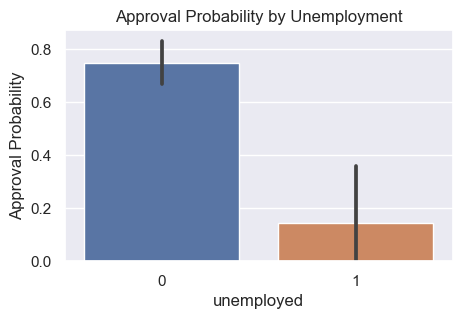

In [5]:
sns.set(rc={'figure.figsize':(5,3)})

sns.barplot(x = 'unemployed', y ='approved', data = df)
plt.ylabel('Approval Probability')
plt.title('Approval Probability by Unemployment')

# Comment: strong correlation between unemployment and unapproval

### Categorical Variable: Female

In [6]:
# 1 for female, 0 for male

df['female'].value_counts(dropna = False)

0    65
1    60
Name: female, dtype: int64

In [7]:
# Correlation between gender and approval

df[['female', 'approved']].groupby('female', as_index = False).mean().sort_values(by = 'approved', ascending = False)

,female,approved
0,0,0.738462
1,1,0.616667


Text(0.5, 1.0, 'Approval Probability by Gender')

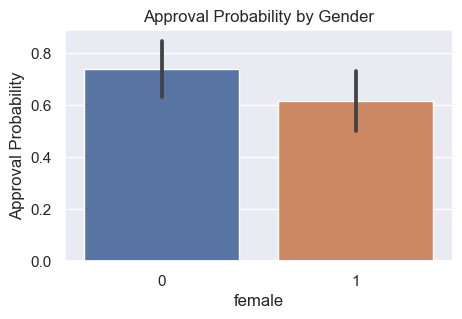

In [8]:
sns.barplot(x = 'female', y ='approved', data = df)
plt.ylabel('Approval Probability')
plt.title('Approval Probability by Gender')

# Comment: males have larger probability of approval

### Categorical Variable: Married

In [9]:
# 1 for married, 0 for single

df['married'].value_counts(dropna = False)

0    66
1    59
Name: married, dtype: int64

In [10]:
# Correlation between marriage and approval

df[['married', 'approved']].groupby('married', as_index = False).mean().sort_values(by = 'approved', ascending = False)

,married,approved
0,0,0.712121
1,1,0.644068


Text(0.5, 1.0, 'Approval Probability by Marriage')

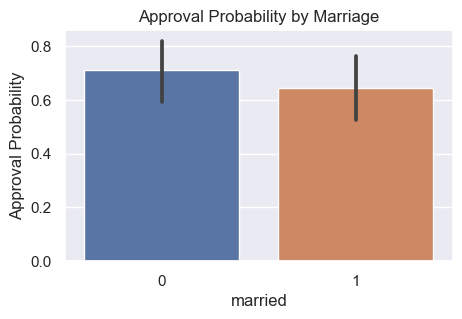

In [11]:
# Visualization

sns.barplot(x = 'married', y ='approved', data = df)
plt.ylabel('Approval Probability')
plt.title('Approval Probability by Marriage')

# Comment: married people have lower probability of approval

### Categorical Variable: Region

In [12]:
# 1 for being in a problematic region, 0 otherwise

df['region'].value_counts(dropna = False)

0    111
1     14
Name: region, dtype: int64

In [13]:
# Correlation between region and approval

df[['region', 'approved']].groupby('region', as_index = False).mean().sort_values(by = 'approved', ascending = False)

,region,approved
0,0,0.720721
1,1,0.357143


Text(0.5, 1.0, 'Approval Probability by Region')

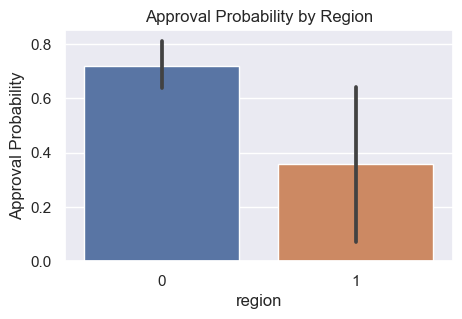

In [14]:
# Visualization

sns.barplot(x = 'region', y ='approved', data = df)
plt.ylabel('Approval Probability')
plt.title('Approval Probability by Region')

# Comment: people not living in problematic regions have larger probability of approval

### Hypothesis

Perhaps women are receiving less approvals because they might be less employed than men. To test that, we shall compare the rates of approval between unemployed women and unemployed men, and vice versa.

In [15]:
df_unemployed = df[(df.unemployed == 1)]

df_unemployed[['female', 'approved']].groupby('female', as_index = False).mean().sort_values(by = 'approved', ascending = False)

,female,approved
1,1,0.2
0,0,0.0


Text(0.5, 1.0, 'Approval Probability for Unemployed People by Gender')

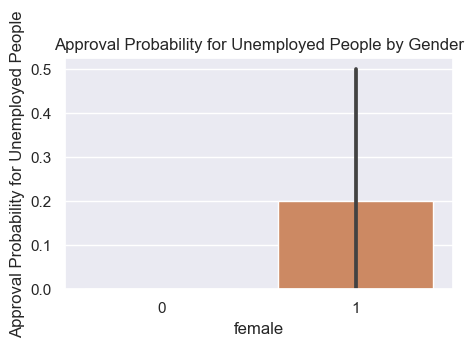

In [16]:
sns.barplot(x = 'female', y ='approved', data = df_unemployed)
plt.ylabel('Approval Probability for Unemployed People')
plt.title('Approval Probability for Unemployed People by Gender')

In [17]:
df_employed = df[(df.unemployed == 0)]

df_employed[['female', 'approved']].groupby('female', as_index = False).mean().sort_values(by = 'approved', ascending = False)

,female,approved
0,0,0.786885
1,1,0.700000


Text(0.5, 1.0, 'Approval Probability for Employed People by Gender')

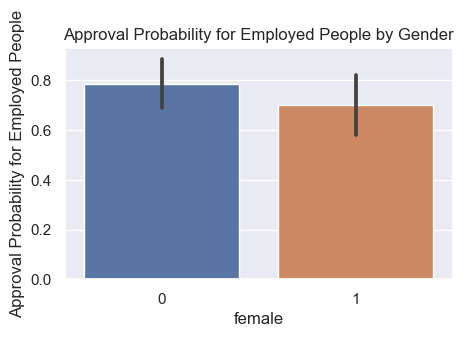

In [18]:
sns.barplot(x = 'female', y ='approved', data = df_employed)
plt.ylabel('Approval Probability for Employed People')
plt.title('Approval Probability for Employed People by Gender')

### Result of Hypothesis

From the data, it seems that unemployed women have a higher chance of approval compared to unemployed men. However, since there are only 4 unemployed men, I believe we don't have enough data to show that. On the other hand, employed females indeed seem to have a lower chance of approval then men. Combining this, it seems that our hypothesis was wrong, and gender indeed plays a role in the approval odds.

### New Hypothesis

Let's test if marriage indeed plays a role in the approval rate. Possibly, married people are less employed as their significant other may be working for the whole family. To test this, let's compare the unemployed singles with employed singles and unemployeds that are married with those that are not

In [19]:
df_unemployed[['married', 'approved']].groupby('married', as_index = False).mean().sort_values(by = 'approved', ascending = False)

# Comment: unemployed people in a marriage seem to have a lower approval rate


,married,approved
0,0,0.181818
1,1,0.000000


In [20]:
df_employed[['married', 'approved']].groupby('married', as_index = False).mean().sort_values(by = 'approved', ascending = False)

# Comment: employed people in a marriage seem to also have a lower approval rate


,married,approved
0,0,0.818182
1,1,0.678571


So it seems that being married indeed plays a role in the acceptance rate

## 3.2 Numerical Variables

Purchase Type, Age, Account Amount, Loan Amount, Payoff Months, Years at Company 

purchase, age, account, loan, months, years

In [21]:
df = df.astype({"approved":"int","unemployed":"int", "female":"int", "married":"int",
               "region":"int", "age":"int", "account":"int", "loan":"int", "months":"int",
               "years":"int"})

In [22]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(df, 2, ['approved', 'unemployed', 'female', 'married', 'region', 'age', 'account', 'loan', 'months', 'years'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 5 indices:  [68, 72, 76, 84, 66]


In [23]:
df.loc[outliers_to_drop, :]

,approved,unemployed,purchase,female,married,region,age,account,loan,months,years
68,0,0,medintru,0,1,1,37,300,50,10,1
72,1,0,medintru,0,0,1,63,50,50,20,25
76,1,0,medintru,0,1,1,26,200,20,10,13
84,1,0,jewel,0,1,1,37,200,50,10,25
66,1,0,medintru,1,0,0,50,300,30,20,27


In [24]:
print("Before: {} rows".format(len(df)))
df = df.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(df)))

Before: 125 rows
After: 120 rows


<AxesSubplot:>

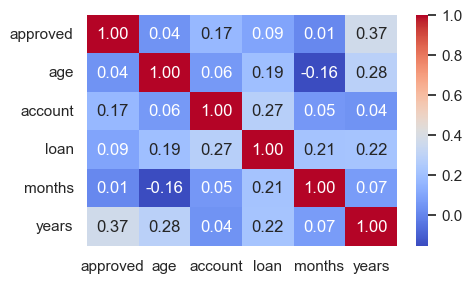

In [25]:
sns.heatmap(df[['approved', 'age', 'account', 'loan', 'months', 'years']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

It seems that only the amount in the person's account and their number of years at the current company play a significant role in the approval rate. Let's look deeper into that

### Numerical Value: Age


Text(0.5, 1.0, 'Age Distribution')

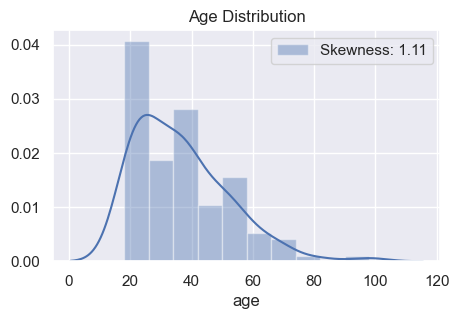

In [26]:
# Age distribution

sns.distplot(df['age'], label = 'Skewness: %.2f'%(df['age'].skew()))
plt.legend(loc = 'best')
plt.ylabel('')
plt.title('Age Distribution')

Text(3.9444444444444446, 0.5, '')

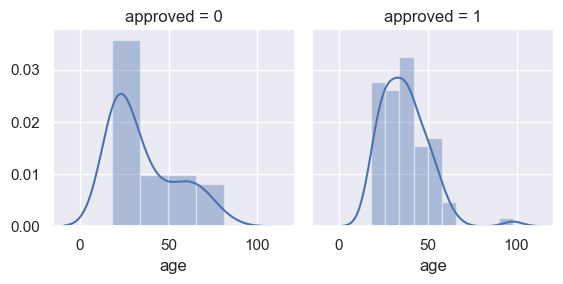

In [27]:
# Age distribution by approval

g = sns.FacetGrid(df, col = 'approved')
g.map(sns.distplot, 'age')

g.axes[0,0].set_ylabel('')

Text(0.5, 1.0, 'Passenger Age Distribution by Approval')

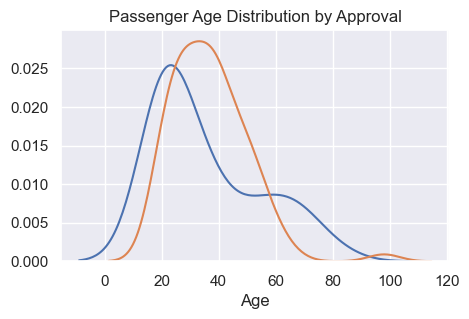

In [28]:
sns.kdeplot(df['age'][df['approved'] == 0], label = 'Not approved')
sns.kdeplot(df['age'][df['approved'] == 1], label = 'Approved')
plt.xlabel('Age')
plt.ylabel('')
plt.title('Passenger Age Distribution by Approval')

There seems to be a correlation between age and approval, and we can also notice that after 50 years the approval rate begins to decrease

### Numerical Value: Account Amount


Text(0, 0.5, 'Approval')

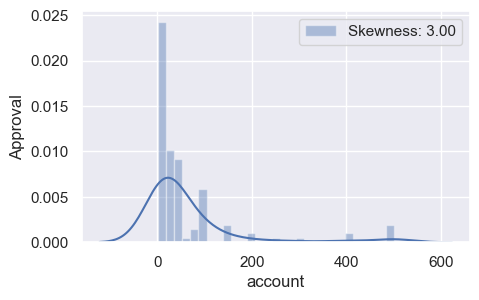

In [29]:
# Account amount distribution

sns.distplot(df['account'], label = 'Skewness: %.2f'%(df['account'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Approval')

Text(-4.555555555555555, 0.5, '')

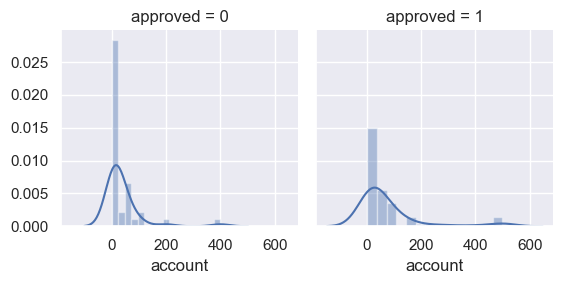

In [30]:
# Account distribution by approval

g = sns.FacetGrid(df, col = 'approved')
g.map(sns.distplot, 'account')

g.axes[0,0].set_ylabel('')

Text(0.5, 1.0, 'Passenger Account Distribution by Approval')

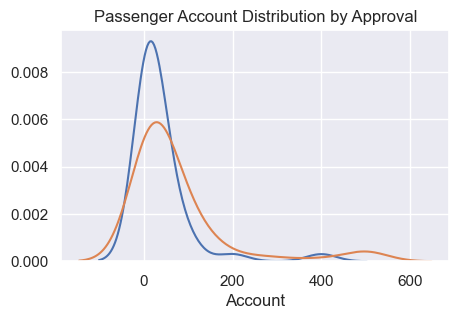

In [31]:
sns.kdeplot(df['account'][df['approved'] == 0], label = 'Not approved')
sns.kdeplot(df['account'][df['approved'] == 1], label = 'Approved')
plt.xlabel('Account')
plt.ylabel('')
plt.title('Passenger Account Distribution by Approval')

The data in both cases peaks close to 0, with some noticeable exceptions close to 400. Nevertheless, there seems to be a small correlation between the ammount of money in the account.

Also note that the skewness of our data is very high. We'll look more into that later.

### Numerical Value: Loan Amount

Text(0, 0.5, 'Approval')

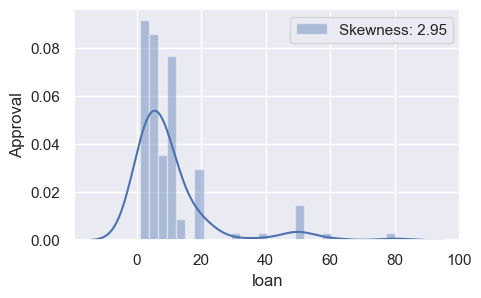

In [32]:
# Account amount distribution

sns.distplot(df['loan'], label = 'Skewness: %.2f'%(df['loan'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Approval')

Text(3.9444444444444446, 0.5, '')

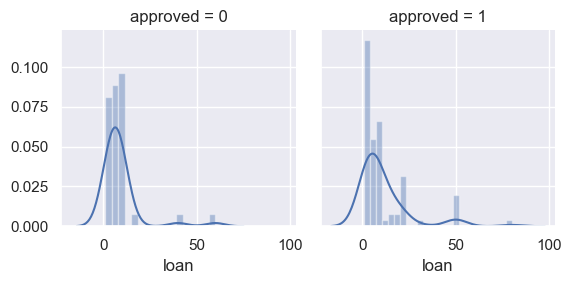

In [33]:
# Loan distribution by approval

g = sns.FacetGrid(df, col = 'approved')
g.map(sns.distplot, 'loan')

g.axes[0,0].set_ylabel('')

Text(0.5, 1.0, 'Passenger Loan Distribution by Approval')

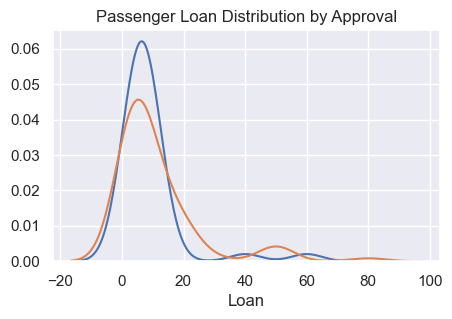

In [34]:
sns.kdeplot(df['loan'][df['approved'] == 0], label = 'Not approved')
sns.kdeplot(df['loan'][df['approved'] == 1], label = 'Approved')
plt.xlabel('Loan')
plt.ylabel('')
plt.title('Passenger Loan Distribution by Approval')

There doesn't seem to be any significant correlation between these variables

### Numerical Value: Months to PayOff Loan


Text(0, 0.5, 'Approval')

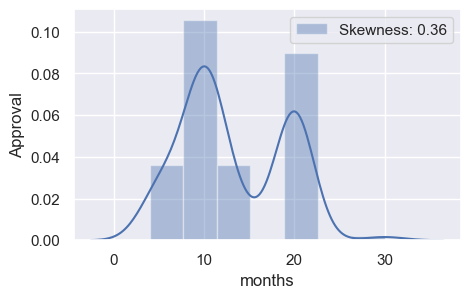

In [35]:
# Account amount distribution

sns.distplot(df['months'], label = 'Skewness: %.2f'%(df['months'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Approval')

Text(3.9444444444444446, 0.5, '')

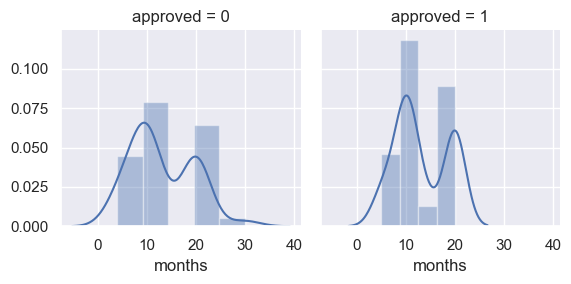

In [36]:
# Months to Payoff Loan distribution by approval

g = sns.FacetGrid(df, col = 'approved')
g.map(sns.distplot, 'months')

g.axes[0,0].set_ylabel('')

Text(0.5, 1.0, 'Passenger Months to Payoff Loan Distribution by Approval')

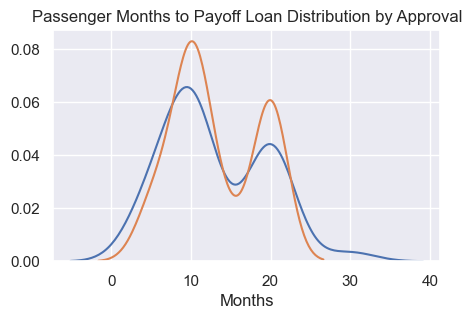

In [37]:
sns.kdeplot(df['months'][df['approved'] == 0], label = 'Not approved')
sns.kdeplot(df['months'][df['approved'] == 1], label = 'Approved')
plt.xlabel('Months')
plt.ylabel('')
plt.title('Passenger Months to Payoff Loan Distribution by Approval')

There doesn't seem to be any significant correlation between these variables

### Numerical Value: Years at Current Company

Text(0, 0.5, 'Approval')

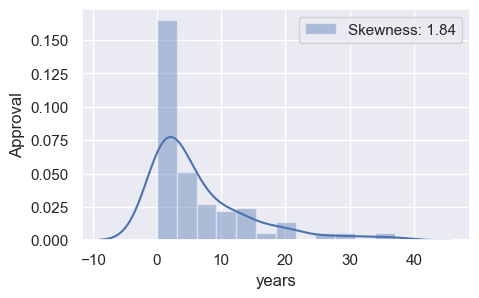

In [38]:
# Account amount distribution

sns.distplot(df['years'], label = 'Skewness: %.2f'%(df['years'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Approval')

Text(12.444444444444445, 0.5, '')

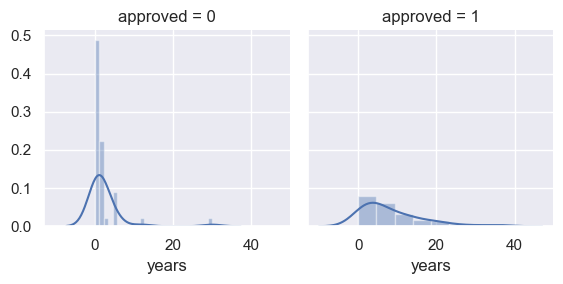

In [39]:
# Years at company distribution by approval

g = sns.FacetGrid(df, col = 'approved')
g.map(sns.distplot, 'years')

g.axes[0,0].set_ylabel('')

Text(0.5, 1.0, 'Passenger Years at Company Distribution by Approval')

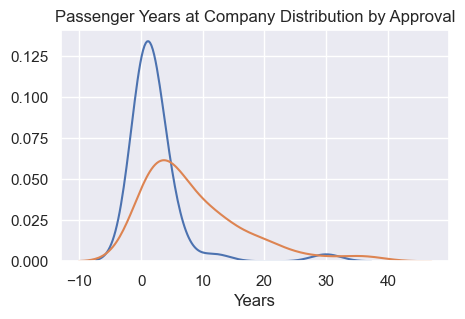

In [40]:
sns.kdeplot(df['years'][df['approved'] == 0], label = 'Not approved')
sns.kdeplot(df['years'][df['approved'] == 1], label = 'Approved')
plt.xlabel('Years')
plt.ylabel('')
plt.title('Passenger Years at Company Distribution by Approval')

There's a clear positive correlation between the number of years at the current company and the approval rate

## Numerical Value: Purchase Type

Text(0.5, 1.0, 'Survival Probability by Purchase Type')

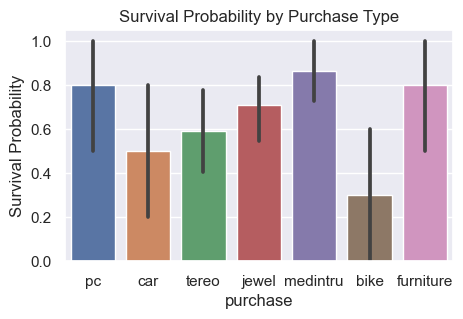

In [41]:
sns.barplot(x = 'purchase', y ='approved', data = df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Purchase Type')

Some types (bike, car, and tereo) seem to have a lower acceptance rate

# 4. Build Predictive Model

## 4.1 Fixing Skewness of Account Amount

Text(0.5, 1.0, 'Passenger Account Amount Distribution After Log Transformation')

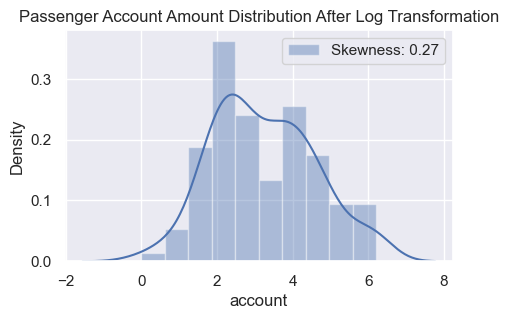

In [42]:
# Apply log transformation to account column to reduce skewness

df['account'] = df['account'].map(lambda x: np.log(x) if x > 0 else 0)

# Passenger account distribution after log transformation

sns.distplot(df['account'], label = 'Skewness: %.2f'%(df['account'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Account Amount Distribution After Log Transformation')

## 4.2 Data Pre-Processing

In [43]:
# Let's take unemployed, purchase type, female, married, region, account, years in company

df = df.drop(['loan', 'months'], axis = 1)

df


,approved,unemployed,purchase,female,married,region,age,account,years
0,1,0,pc,1,1,0,18,2.995732,1
1,1,0,pc,1,1,0,20,2.302585,2
2,0,1,pc,1,0,1,25,1.609438,0
3,1,0,pc,1,0,0,40,1.609438,2
4,1,0,pc,1,1,1,50,1.609438,25
...,...,...,...,...,...,...,...,...,...
115,1,0,furniture,0,0,0,40,4.094345,20
116,1,0,furniture,0,0,0,50,4.499810,20
117,1,0,furniture,0,1,0,30,4.248495,10
118,1,0,furniture,0,0,0,35,2.995732,13


In [44]:
# Converting purchase type to number

# df['purchase'] = df['purchase'].fillna(0).map({'pc': 0, 'car': 1, 'stereo': 2, 'jewel': 3, 'medinstru': 4, 'bike': 5, 'furniture': 6})

def replacer(df, list):
    for i in range(len(list)):
        df.replace(to_replace=list[i], value=i+1, inplace=True)

listreplace = ['pc', 'car', 'stereo', 'jewel', 'medinstru', 'bike', 'furniture']
    
df.replace(to_replace='tereo', value=3, inplace=True)
df.replace(to_replace='medintru', value=5, inplace=True)
    
replacer(df, listreplace)

df.head(60)

,approved,unemployed,purchase,female,married,region,age,account,years
0,1,0,1,1,1,0,18,2.995732,1
1,1,0,1,1,1,0,20,2.302585,2
2,0,1,1,1,0,1,25,1.609438,0
3,1,0,1,1,0,0,40,1.609438,2
4,1,0,1,1,1,1,50,1.609438,25
5,1,0,1,0,1,0,18,2.302585,1
6,1,0,1,0,1,0,22,2.302585,4
7,1,0,1,0,0,0,28,2.708050,5
8,1,0,1,0,0,0,40,2.995732,15
9,0,1,1,0,0,0,50,1.609438,0


In [45]:
# Create age bands and compute mean of survival by age bands

# df_copy = df.copy()

df['age'] = pd.cut(df['age'], 5)
df[['age', 'approved']].groupby('age', as_index=False).mean().sort_values(by = 'age')

,age,approved
0,"(17.92, 34.0]",0.603448
1,"(34.0, 50.0]",0.833333
2,"(50.0, 66.0]",0.714286
3,"(66.0, 82.0]",0.000000
4,"(82.0, 98.0]",1.000000


In [46]:
df.head()

,approved,unemployed,purchase,female,married,region,age,account,years
0,1,0,1,1,1,0,"(17.92, 34.0]",2.995732,1
1,1,0,1,1,1,0,"(17.92, 34.0]",2.302585,2
2,0,1,1,1,0,1,"(17.92, 34.0]",1.609438,0
3,1,0,1,1,0,0,"(34.0, 50.0]",1.609438,2
4,1,0,1,1,1,1,"(34.0, 50.0]",1.609438,25


In [47]:
# Assign ordinals to each age band 

df.replace(to_replace=df.iloc[0]['age'], value=1, inplace=True)
df.replace(to_replace=df.iloc[3]['age'], value=2, inplace=True)
df.replace(to_replace=df.iloc[22]['age'], value=3, inplace=True)
df.replace(to_replace=df.iloc[24]['age'], value=4, inplace=True)
df.replace(to_replace=df.iloc[28]['age'], value=5, inplace=True)

df

,approved,unemployed,purchase,female,married,region,age,account,years
0,1,0,1,1,1,0,1,2.995732,1
1,1,0,1,1,1,0,1,2.302585,2
2,0,1,1,1,0,1,1,1.609438,0
3,1,0,1,1,0,0,2,1.609438,2
4,1,0,1,1,1,1,2,1.609438,25
...,...,...,...,...,...,...,...,...,...
115,1,0,7,0,0,0,2,4.094345,20
116,1,0,7,0,0,0,2,4.499810,20
117,1,0,7,0,1,0,1,4.248495,10
118,1,0,7,0,0,0,2,2.995732,13


In [48]:
df.head(60)

,approved,unemployed,purchase,female,married,region,age,account,years
0,1,0,1,1,1,0,1,2.995732,1
1,1,0,1,1,1,0,1,2.302585,2
2,0,1,1,1,0,1,1,1.609438,0
3,1,0,1,1,0,0,2,1.609438,2
4,1,0,1,1,1,1,2,1.609438,25
5,1,0,1,0,1,0,1,2.302585,1
6,1,0,1,0,1,0,1,2.302585,4
7,1,0,1,0,0,0,1,2.708050,5
8,1,0,1,0,0,0,2,2.995732,15
9,0,1,1,0,0,0,2,1.609438,0


In [49]:
# Create age bands and compute mean of survival by age bands

# df_copy = df.copy()

df['account'] = pd.cut(df['account'], 5)
df[['account', 'approved']].groupby('account', as_index=False).mean().sort_values(by = 'account')

,account,approved
0,"(-0.00621, 1.243]",0.200000
1,"(1.243, 2.486]",0.560976
2,"(2.486, 3.729]",0.785714
3,"(3.729, 4.972]",0.718750
4,"(4.972, 6.215]",0.857143


In [50]:
df.replace(to_replace=df.iloc[29]['account'], value=1, inplace=True)
df.replace(to_replace=df.iloc[1]['account'], value=2, inplace=True)
df.replace(to_replace=df.iloc[0]['account'], value=3, inplace=True)
df.replace(to_replace=df.iloc[10]['account'], value=4, inplace=True)
df.replace(to_replace=df.iloc[13]['account'], value=5, inplace=True)

df.tail(60)

,approved,unemployed,purchase,female,married,region,age,account,years
60,1,0,4,0,0,0,2,3,20
61,1,0,4,0,0,0,3,4,37
62,1,0,5,1,1,0,1,5,2
63,1,0,5,1,0,0,2,4,1
64,1,0,5,1,0,0,2,4,18
65,0,0,5,1,0,0,3,4,30
66,1,0,5,0,0,0,2,5,10
67,1,0,5,0,1,0,2,5,18
68,1,0,5,0,0,0,3,4,30
69,1,0,5,1,0,0,3,4,11


In [51]:
# Create age bands and compute mean of survival by age bands

# df_copy = df.copy()

df['years'] = pd.cut(df['years'], 5)
df[['years', 'approved']].groupby('years', as_index=False).mean().sort_values(by = 'years')

,years,approved
0,"(-0.037, 7.4]",0.569767
1,"(7.4, 14.8]",0.944444
2,"(14.8, 22.2]",1.000000
3,"(22.2, 29.6]",1.000000
4,"(29.6, 37.0]",0.750000


In [52]:
df.replace(to_replace=df.iloc[0]['years'], value=1, inplace=True)
df.replace(to_replace=df.iloc[27]['years'], value=2, inplace=True)
df.replace(to_replace=df.iloc[18]['years'], value=3, inplace=True)
df.replace(to_replace=df.iloc[92]['years'], value=4, inplace=True)
df.replace(to_replace=df.iloc[61]['years'], value=5, inplace=True)

df.head()

,approved,unemployed,purchase,female,married,region,age,account,years
0,1,0,1,1,1,0,1,3,1
1,1,0,1,1,1,0,1,2,1
2,0,1,1,1,0,1,1,2,1
3,1,0,1,1,0,0,2,2,1
4,1,0,1,1,1,1,2,2,4


In [53]:
df

,approved,unemployed,purchase,female,married,region,age,account,years
0,1,0,1,1,1,0,1,3,1
1,1,0,1,1,1,0,1,2,1
2,0,1,1,1,0,1,1,2,1
3,1,0,1,1,0,0,2,2,1
4,1,0,1,1,1,1,2,2,4
...,...,...,...,...,...,...,...,...,...
115,1,0,7,0,0,0,2,4,3
116,1,0,7,0,0,0,2,4,3
117,1,0,7,0,1,0,1,4,2
118,1,0,7,0,0,0,2,3,2


## 4.3 Modelling

In [54]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def ml_model(model,df):
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
 
    #Implementing cross validation
 
    k = 5
    kf = KFold(n_splits=k, random_state=None)
    
    acc_score = []
 
    for train_index , test_index in kf.split(X):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
     
        model.fit(X_train,y_train)
        pred_values = model.predict(X_test)
     
        acc = accuracy_score(pred_values , y_test)
        acc_score.append(acc)
     
    return acc_score

In [55]:
# These will be used for visualization later

cv_mean = []
cv_std = []

### 4.3.1 Logistic Regression

In [56]:
acc_log = ml_model(LogisticRegression(), df)
avg_log = sum(acc_log)/5

cv_mean.append(avg_log)
cv_std.append(np.std(acc_log))

print('Accuracy of each fold - {}'.format(acc_log))
print('Avg accuracy : {}'.format(avg_log))

Accuracy of each fold - [0.8333333333333334, 0.6666666666666666, 0.5416666666666666, 0.5833333333333334, 0.7083333333333334]
Avg accuracy : 0.6666666666666667


### 4.3.2. Support Vector Machines

In [57]:
acc_svc = ml_model(SVC(), df)
avg_svc = sum(acc_svc)/5

cv_mean.append(avg_svc)
cv_std.append(np.std(acc_svc))

print('Accuracy of each fold - {}'.format(acc_svc))
print('Avg accuracy : {}'.format(avg_svc))

Accuracy of each fold - [0.8333333333333334, 0.7083333333333334, 0.5416666666666666, 0.8333333333333334, 0.6666666666666666]
Avg accuracy : 0.7166666666666667


### 4.3.3. K-Nearest Neighbors (KNN)

In [58]:
acc_knn = ml_model(KNeighborsClassifier(n_neighbors = 5), df)
avg_knn = sum(acc_knn)/5

cv_mean.append(avg_knn)
cv_std.append(np.std(acc_knn))

print('Accuracy of each fold - {}'.format(acc_knn))
print('Avg accuracy : {}'.format(avg_knn))

Accuracy of each fold - [0.7916666666666666, 0.75, 0.5833333333333334, 0.625, 0.6666666666666666]
Avg accuracy : 0.6833333333333333


### 4.3.4. Gaussian Naive Bayes

In [59]:
acc_gnb = ml_model(GaussianNB(), df)
avg_gnb = sum(acc_gnb)/5

cv_mean.append(avg_gnb)
cv_std.append(np.std(acc_gnb))

print('Accuracy of each fold - {}'.format(acc_gnb))
print('Avg accuracy : {}'.format(avg_gnb))

Accuracy of each fold - [0.2916666666666667, 0.5, 0.2916666666666667, 0.20833333333333334, 0.2916666666666667]
Avg accuracy : 0.3166666666666667


### 4.3.5. Perceptron

In [60]:
acc_per = ml_model(Perceptron(), df)
avg_per = sum(acc_per)/5

cv_mean.append(avg_per)
cv_std.append(np.std(acc_per))

print('Accuracy of each fold - {}'.format(acc_per))
print('Avg accuracy : {}'.format(avg_per))

Accuracy of each fold - [0.75, 0.5416666666666666, 0.5, 0.8333333333333334, 0.6666666666666666]
Avg accuracy : 0.6583333333333333


### 4.3.6. Linear SVC

In [61]:
acc_linsvc = ml_model(LinearSVC(), df)
avg_linsvc = sum(acc_linsvc)/5

cv_mean.append(avg_linsvc)
cv_std.append(np.std(acc_linsvc))

print('Accuracy of each fold - {}'.format(acc_linsvc))
print('Avg accuracy : {}'.format(avg_linsvc))

Accuracy of each fold - [0.75, 0.625, 0.5833333333333334, 0.625, 0.75]
Avg accuracy : 0.6666666666666667


### 4.3.7. Stochastic Gradient Descent

In [62]:
acc_sgd = ml_model(SGDClassifier(), df)
avg_sgd = sum(acc_sgd)/5

cv_mean.append(avg_sgd)
cv_std.append(np.std(acc_sgd))

print('Accuracy of each fold - {}'.format(acc_sgd))
print('Avg accuracy : {}'.format(avg_sgd))

Accuracy of each fold - [0.6666666666666666, 0.5416666666666666, 0.625, 0.5833333333333334, 0.4166666666666667]
Avg accuracy : 0.5666666666666667


### 4.3.8. Decision Tree

In [63]:
acc_dtc = ml_model(DecisionTreeClassifier(), df)
avg_dtc = sum(acc_dtc)/5

cv_mean.append(avg_dtc)
cv_std.append(np.std(acc_dtc))

print('Accuracy of each fold - {}'.format(acc_dtc))
print('Avg accuracy : {}'.format(avg_dtc))

Accuracy of each fold - [0.5833333333333334, 0.7916666666666666, 0.5416666666666666, 0.4583333333333333, 0.7916666666666666]
Avg accuracy : 0.6333333333333333


### 4.3.9. Random Forest

In [64]:
acc_rfc = ml_model(RandomForestClassifier(n_estimators=100), df)
avg_rfc = sum(acc_rfc)/5

cv_mean.append(avg_rfc)
cv_std.append(np.std(acc_rfc))

print('Accuracy of each fold - {}'.format(acc_rfc))
print('Avg accuracy : {}'.format(avg_rfc))

Accuracy of each fold - [0.7083333333333334, 0.8333333333333334, 0.625, 0.5833333333333334, 0.75]
Avg accuracy : 0.7000000000000001


## Results

In [66]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.716667,0.109924,Support Vector Machines
1,0.700000,0.088976,Random Forest
2,0.683333,0.077280,KNN
3,0.666667,0.102062,Logistic Regression
4,0.666667,0.069722,Linear SVC
5,0.658333,0.124722,Perceptron
6,0.633333,0.135401,Decision Tree
7,0.566667,0.085797,Stochastic Gradient Descent
8,0.316667,0.097183,Gausian Naive Bayes


Text(0.5, 1.0, 'Cross Validation Scores')

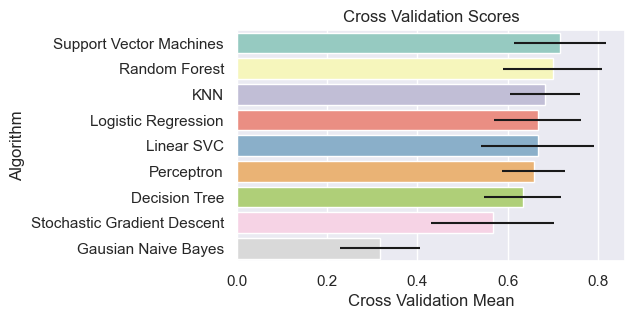

In [67]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

# 5. Conclusion

We can see that Support Vector Machines is the preferred ML model for our data. It gives us a mean of 72% with a 11% standard deviation

# 6. References

This was my first data science project, and it was honestly very fun (it made me reconsider the idea of going to SWE haha)! I watched some youtube tutorials ([video one](https://youtu.be/I3FBJdiExcg), [video two part one](https://youtu.be/GSk-EEu1zkA), [video two part two](https://youtu.be/i5E2hruuLaQ)) about the kaggle titanic project for inspiration and also got some code from other jupyter notebooks (mostly syntax)

Thanks!